Study of noncoding functional variants

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
import attila_utils
from bsmcalls import SNPnexus
from bsmcalls import operations
from bsmcalls import resources
from bsmcalls import individuals
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
data = SNPnexus.load_data('/home/attila/projects/bsm/results/2020-09-07-annotations/annotated-calls.p')

['named-figure/cadd.png', 'named-figure/cadd.pdf']

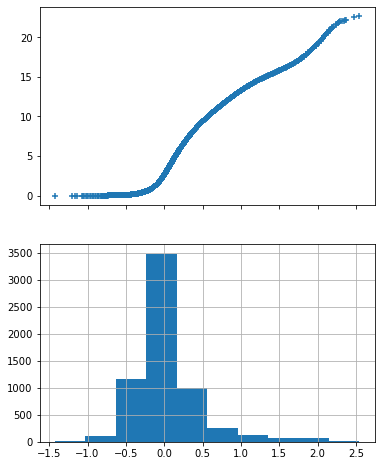

In [3]:
%matplotlib inline
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
ax[0].scatter(x='cadd_Raw Score', y='cadd_PHRED', marker='+', data=data)
data['cadd_Raw Score'].hist(ax=ax[1])
attila_utils.savefig(fig, 'cadd')

['named-figure/eigen.png', 'named-figure/eigen.pdf']

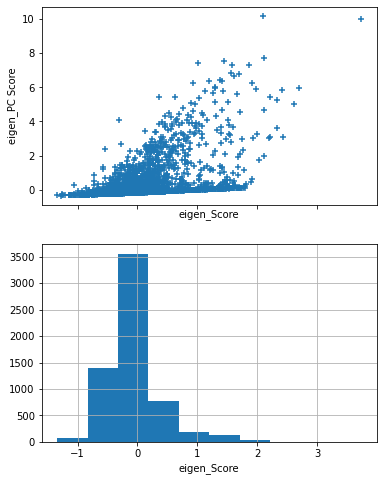

In [4]:
%matplotlib inline
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
ax[0].scatter(x='eigen_Score', y='eigen_PC Score', marker='+', data=data)
data['eigen_Score'].hist(ax=ax[1])
ax[0].set_xlabel('eigen_Score')
ax[0].set_ylabel('eigen_PC Score')
ax[1].set_xlabel('eigen_Score')
attila_utils.savefig(fig, 'eigen')

['named-figure/deepsea-corrmat-scatter.png',
 'named-figure/deepsea-corrmat-scatter.pdf']

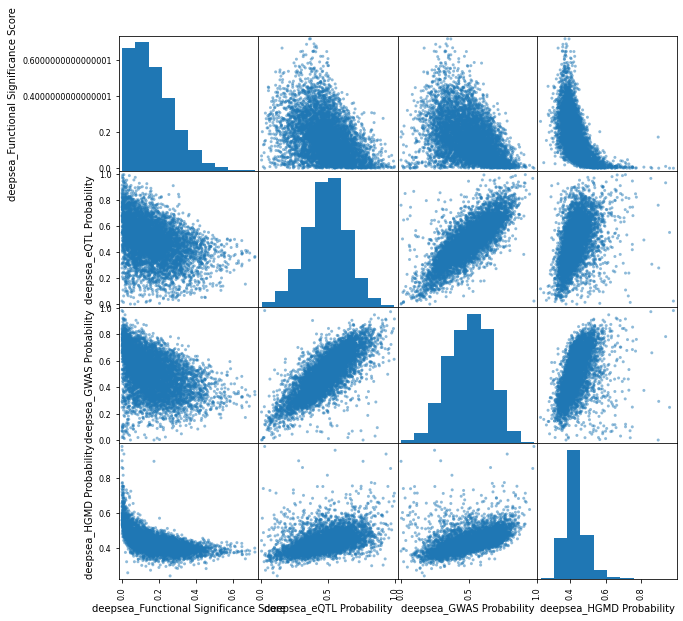

In [5]:
cols = [c for c in data.columns if re.match('^deepsea.*', c)]
ax = pd.plotting.scatter_matrix(data[cols], figsize=(10, 10))
attila_utils.savefig(fig, 'deepsea-corrmat-scatter')

['named-figure/deepsea-corrmat-image.png',
 'named-figure/deepsea-corrmat-image.pdf']

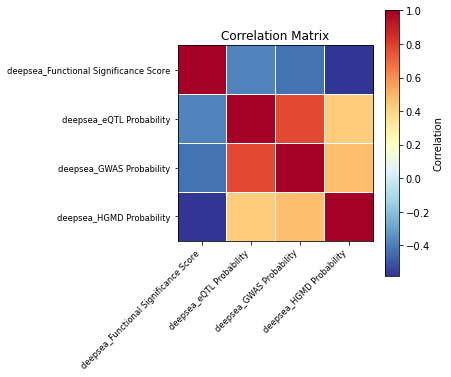

In [6]:
def corrmatplot(dfnum):
    corrmat = dfnum.corr()
    fig, ax = plt.subplots(figsize=(6, 6))
    sm.graphics.plot_corr(corrmat, ax=ax, xnames=dfnum.columns, ynames=dfnum.columns)
    cb = plt.colorbar(ax.get_images()[0])
    cb.set_label('Correlation')
    return((fig, ax))

corrmatplot(data[cols])
attila_utils.savefig(fig, 'deepsea-corrmat-image')

['named-figure/selected-noncoding-corrmat-scatter.png',
 'named-figure/selected-noncoding-corrmat-scatter.pdf']

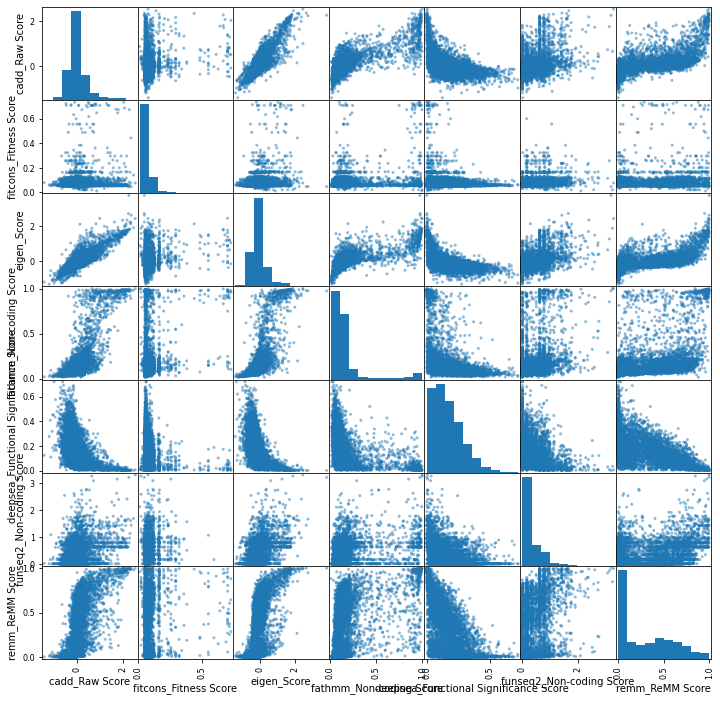

In [7]:
%matplotlib inline
cols = ['cadd_Raw Score', 'fitcons_Fitness Score', 'eigen_Score', 'fathmm_Non-coding Score', 'deepsea_Functional Significance Score', 'funseq2_Non-coding Score', 'remm_ReMM Score']
ax = pd.plotting.scatter_matrix(data[cols], figsize=(12, 12))
attila_utils.savefig(fig, 'selected-noncoding-corrmat-scatter')

['named-figure/selected-noncoding-corrmat-image.png',
 'named-figure/selected-noncoding-corrmat-image.pdf']

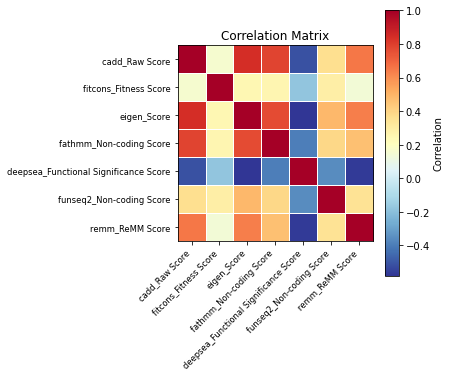

In [8]:
corrmatplot(data[cols])
attila_utils.savefig(fig, 'selected-noncoding-corrmat-image')

['named-figure/all-noncoding-corrmat-image.png',
 'named-figure/all-noncoding-corrmat-image.pdf']

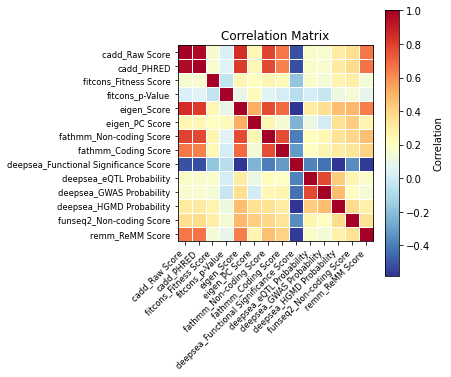

In [9]:
corrmatplot(data.loc[:, 'cadd_Raw Score':'remm_ReMM Score'].select_dtypes('float64'))
attila_utils.savefig(fig, 'all-noncoding-corrmat-image')

In [11]:
%connect_info

{
  "shell_port": 46031,
  "iopub_port": 34495,
  "stdin_port": 51485,
  "control_port": 40625,
  "hb_port": 45145,
  "ip": "127.0.0.1",
  "key": "30a64bd6-3a945b6c658ad56cea1c142c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d5ed5c27-c856-48ca-a0f4-a9b10420327b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
